# Decision Tree

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='ticks')
%matplotlib inline

In [2]:
try:
    os.chdir(os.path.join(os.path.dirname(os.getcwd()), r'exercise-py'))
    print(os.getcwd())
except:
    pass

P:\2019 Study\Python\coursera-mlclass-ex-python\exercise-py


## Scikit-learn training with iris datasets

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [4]:
X = iris.data[:, 2:]  # petal length and width
y = iris.target

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

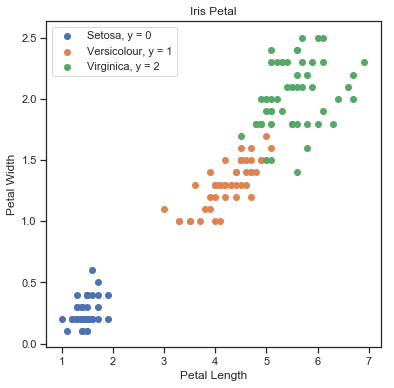

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X[y==0, 0], X[y==0, 1], label='Setosa, y = 0')
ax.scatter(X[y==1, 0], X[y==1, 1], label='Versicolour, y = 1')
ax.scatter(X[y==2, 0], X[y==2, 1], label='Virginica, y = 2')
ax.set_title('Iris Petal')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend()
None

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

### Plot the Decision Tree

In [37]:
from sklearn.tree import export_graphviz
import graphviz


export_graphviz(
        tree_clf,
        out_file=r'images\iris_tree.dot',
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
with open('images\iris_tree.dot') as dot_file:
    dot_graph = dot_file.read()
graphviz.Source(dot_graph)
os.system('dot -Tpng "images\iris_tree.dot" -o "images\iris_tree.png"')

0

### Cost function of CART algorithm classfication

For feature $k$ and threshold $t_k$, $J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$. G is impurity and m is the number of instance.

Training Complexity: $O(n*m\log m)$
Prediction Complexity: $O(\log m)$

### ID3 and Entropy gain

## Regression

### Cost function of CART algorithm regression

$J(k, t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$

## Strength and Weakness

* little preparation for data
* white box: simple to understand and interpret.
* easy to use, versatile and powerful.

* overfitting: regulate max_depth, min_samples_split, etc.
* orthogonal decisions: use PCA to get better orientation of the data.
* sensitive to small variations: averaging predictions over many trees.